# Static Affine Benchmark Generation

This notebook can be used to generate static affine benchmark used in the paper, or modified to create more similar benchmarks. <br>

The exact data used in the paper is stored under `data/static-affine-benchmark.csv`.

In [1]:
%load_ext autoreload

In [2]:
import sys

sys.path.append(r"..")

In [3]:
from time import time as clock_timer

import numpy as np
import pandas as pd
import torch
import wandb
import lovely_tensors as lt
import seaborn as sns
from scipy import signal
from matplotlib import pyplot as plt

In [4]:
sns.set()

# Static System


A simple static affine system with a input signal consisting of pure-tone sine waves was created to test FSNN structure, under conditions most suitable for it. The input signal was generated using a sum of frequencies drawn from uniform distribution: $\alpha \sim \mathcal{U}(-5, 5)$, which is given by equation below:

$$ u(t) = \sum_{i=1}^{5} sin(\alpha_i t) $$

The output of the system was generated using two additional parameters, randomly drawn from the uniform distribution $\mathcal{U}(-5, 5)$, similar to the excitation frequencies. Those are denoted as $\beta_1,\beta_2$ in 

$$  f(u) = \beta_1 u(t) + \pi \beta_2 $$

# Generation

In [5]:
multiplcative_coeff = 10 * np.random.rand() - 5  # range [-5, 5]
phase_coeff = 10 * np.random.rand() - 5

multiplcative_coeff, phase_coeff

(-2.2066969302781025, 3.742728886580025)

In [6]:
frequencies = 10 * np.random.rand(5) - 5
frequencies

array([-1.57790389,  2.13995823, -4.4762937 ,  3.13275804,  2.18140891])

In [7]:
def system(u):
    return multiplcative_coeff * u + (np.pi * phase_coeff)

# Plot System

In [8]:
t = np.linspace(0, 100 * np.pi, 50_000, endpoint=True)
u = np.sum([np.sin(freq * t) for freq in frequencies.tolist()], axis=0)
y = system(u) #+ 0.1 * np.random.rand(50_000)

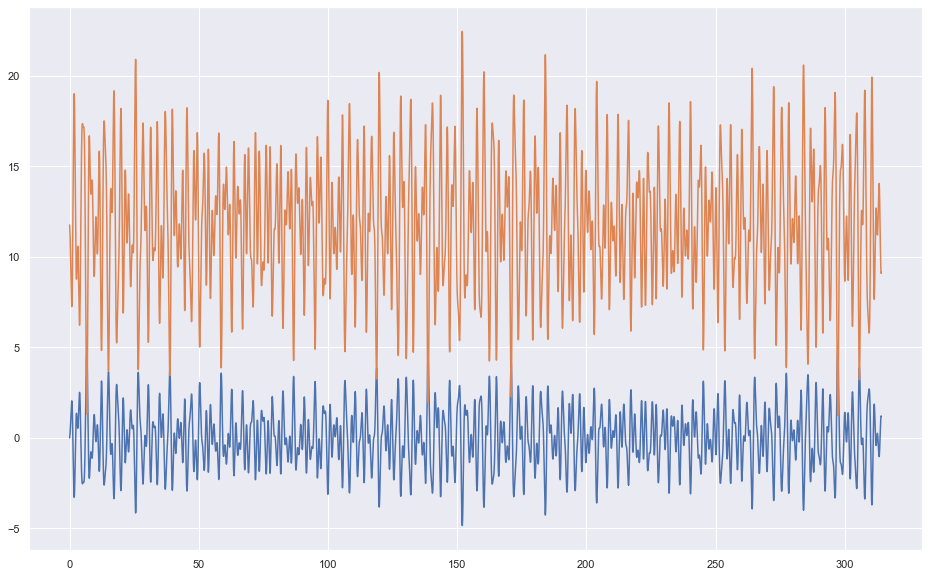

In [9]:
plt.figure(figsize=[16, 10])

_ = plt.plot(t, u)
_ = plt.plot(t, y)